### Analysing and predicting Click activity by one user

> Clicked - Target variable; whether the user will click the ad or not.<br>
> Names,emails,country - Highly cardinal categorical columns, need to be removed or replaced<br>
> Time Spent on Site - Minutes spent by the user in one session.<br>
> Salary - Salary of user<br>


In [1]:
import pandas as pd
import pycountry_convert as pc

import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df_orig = pd.read_csv('Facebook_Ads_2.csv',encoding='latin1')
df_orig.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


### Use Continent instead of highly cardinal Country  and re-map unidentified countries manually



In [3]:
df_orig.nunique()

Names                 497
emails                499
Country               210
Time Spent on Site    499
Salary                499
Clicked                 2
dtype: int64

In [4]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unidentified"

df  = df_orig.copy()
df['Continent'] = df['Country'].apply(country_to_continent)
df


,Names,emails,Country,Time Spent on Site,Salary,Clicked,Continent
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0,Europe
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1,North America
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0,Africa
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1,Oceania
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0,South America
...,...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0,Africa
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0,Asia
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0,Africa
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0,Asia


In [5]:
df.groupby('Continent').agg({'Country':'nunique'})

,Country
Continent,
Africa,45
Antarctica,1
Asia,44
Europe,37
North America,32
Oceania,23
South America,14
Unidentified,14


Replace Unidentified Continents by manually mapping the countries

In [6]:
list_countries = list(df[df['Continent']=='Unidentified'].Country.unique())
list_countries

['Sint Maarten',
 'Timor-Leste',
 'Reunion',
 'United States Minor Outlying Islands',
 'Heard Island and Mcdonald Islands',
 'Congo (Brazzaville)',
 'Virgin Islands, United States',
 'French Southern Territories',
 'Saint Vincent and The Grenadines',
 'Western Sahara',
 'United Kingdom (Great Britain)',
 'South Georgia and The South Sandwich Islands',
 'Antarctica',
 'Korea, South']

In [7]:
list_continents=['North America','Asia','Africa','North America','Antarctica','Africa','North America','Antarctica',
                 'North America','Africa','Europe','Antarctica','Antarctica','Asia']
dict_to_map_countries = dict(zip(list_countries,list_continents))

def map_country_continent(X):
    if X[1]=='Unidentified':
        X[1]=X[0].map(dict_to_map_countries)
    return X[1]

df.loc[df['Continent']=='Unidentified','Continent'] = \
      df.loc[df['Continent']=='Unidentified','Country'].map(dict_to_map_countries)
df.groupby('Continent').agg({'Country':'nunique'})

,Country
Continent,
Africa,48
Antarctica,5
Asia,46
Europe,38
North America,36
Oceania,23
South America,14


Now we have all 7 continents identified. We can use this variable instead of the highly cardinal Country variable.

### EDA

In [8]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked,Continent
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0,Europe
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1,North America
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0,Africa
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1,Oceania
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0,South America


<AxesSubplot:>

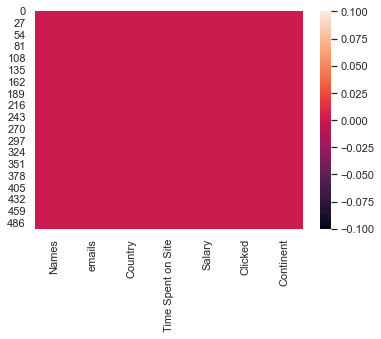

In [9]:
# Missing values in data
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Continent', ylabel='count'>

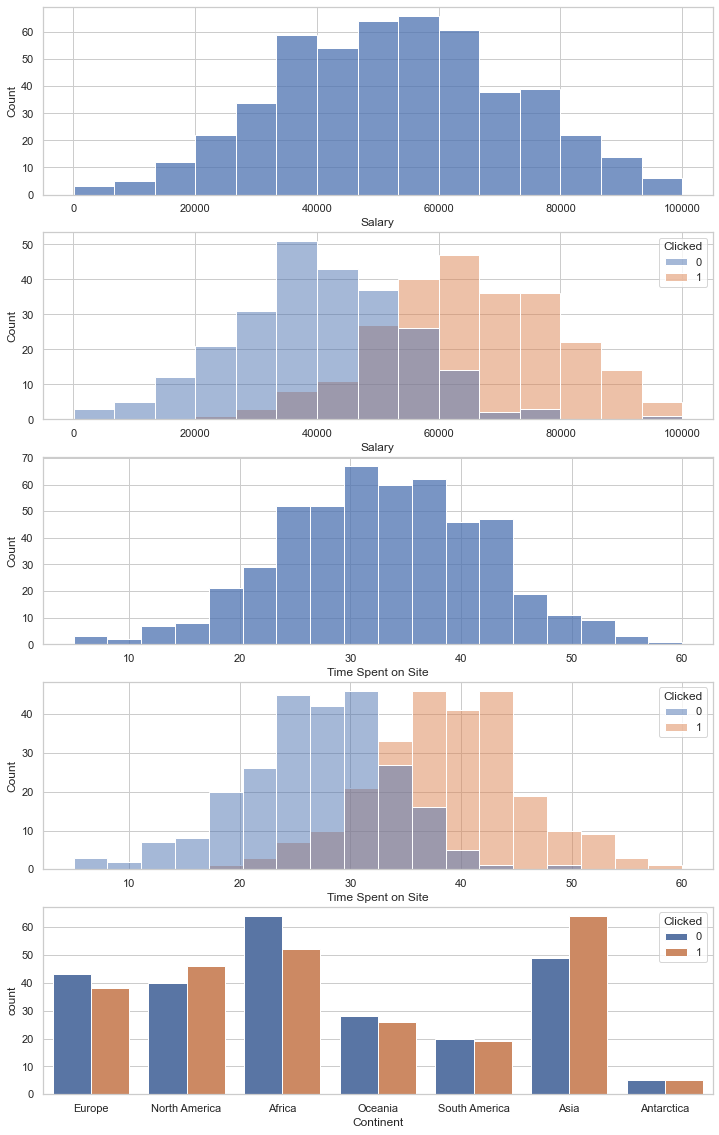

In [10]:
plt.figure(figsize=(12,20))
plt.subplot(511)
sns.histplot(data=df,x='Salary')
plt.subplot(512)
sns.histplot(data=df,x='Salary',hue='Clicked')
plt.subplot(513)
sns.histplot(data=df,x='Time Spent on Site')
plt.subplot(514)
sns.histplot(data=df,x='Time Spent on Site',hue='Clicked')
plt.subplot(515)
sns.countplot(data=df,x='Continent',hue='Clicked')


<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

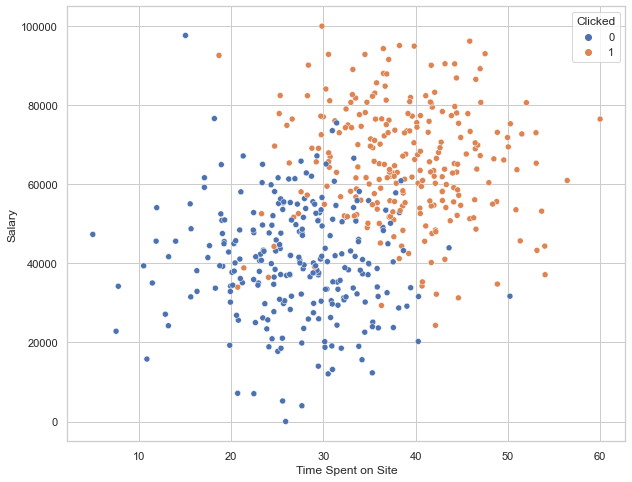

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Time Spent on Site',y='Salary',hue='Clicked')

### Prepare final dataset

In [12]:
# Prepare Final Processed data

continents = pd.get_dummies(df['Continent'],drop_first=True)
processed_data = df.drop(columns=['Country','Names','emails','Continent']).join(continents)

processed_data

,Time Spent on Site,Salary,Clicked,Antarctica,Asia,Europe,North America,Oceania,South America
0,25.649648,55330.06006,0,0,0,1,0,0,0
1,32.456107,79049.07674,1,0,0,0,1,0,0
2,20.945978,41098.60826,0,0,0,0,0,0,0
3,54.039325,37143.35536,1,0,0,0,0,1,0
4,34.249729,37355.11276,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
494,19.222746,44969.13495,0,0,0,0,0,0,0
495,22.665662,41686.20425,0,0,1,0,0,0,0
496,35.320239,23989.80864,0,0,0,0,0,0,0
497,26.539170,31708.57054,0,0,1,0,0,0,0


In [13]:
X = processed_data.drop(columns='Clicked').values
y = processed_data['Clicked'].values.reshape(-1,1)

min_max = MinMaxScaler()
X=min_max.fit_transform(X)
X.shape,y.shape

((499, 8), (499, 1))

### Model - Logistic regression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((399, 8), (100, 8), (399, 1), (100, 1))

In [15]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

/Users/eashwar/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:title={'center':'Test set'}>

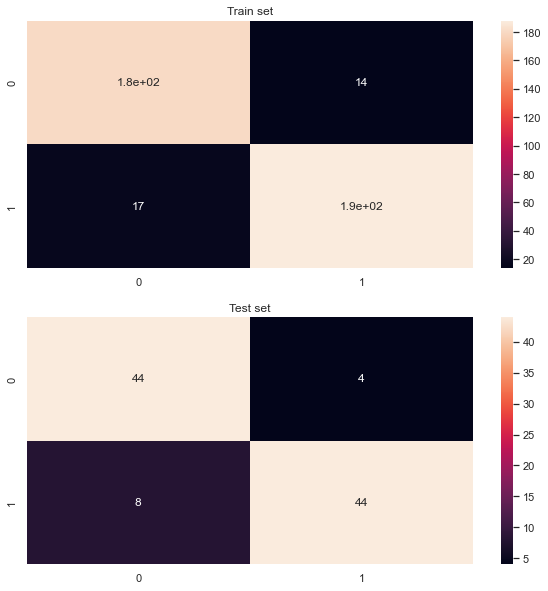

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Train set')
sns.heatmap(confusion_matrix(y_pred_train,y_train),annot=True)
plt.subplot(212)
plt.title('Test set')
sns.heatmap(confusion_matrix(y_pred_test,y_test),annot=True)


In [17]:
print("Train set\n")
print(classification_report(y_pred_train,y_train))

Train set

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       194
           1       0.93      0.92      0.92       205

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [18]:
print("Test set\n")
print(classification_report(y_pred_test,y_test))

Test set

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.92      0.85      0.88        52

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

